In [164]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [165]:
#Loading the dataset
dataset =pd.read_csv("adani.csv")

In [166]:
dataset.head()

,date,open,high,low,close,volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,1612972


In [167]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    669 non-null    object 
 1   open    669 non-null    float64
 2   high    669 non-null    float64
 3   low     669 non-null    float64
 4   close   669 non-null    float64
 5   volume  669 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [168]:
#to_datetime function for converting "date" object data type into datetime data type
dataset['date']= pd.to_datetime(dataset['date'], infer_datetime_format=True)

In [169]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    669 non-null    datetime64[ns]
 1   open    669 non-null    float64       
 2   high    669 non-null    float64       
 3   low     669 non-null    float64       
 4   close   669 non-null    float64       
 5   volume  669 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 31.5 KB


In [170]:
#setting data column as a index
dataset.set_index('date')

,open,high,low,close,volume
date,,,,,
2018-06-18,30.000000,31.500000,28.500000,31.500000,7006229
2018-06-19,32.700001,33.049999,31.000000,32.599998,2895692
2018-06-20,31.500000,32.200001,31.000000,31.000000,1115553
2018-06-21,29.450001,30.000000,29.450001,29.650000,2854524
2018-06-22,28.200001,29.799999,28.200001,29.450001,1612972
...,...,...,...,...,...
2021-03-01,1170.000000,1170.000000,1130.150024,1141.000000,448402
2021-03-02,1155.000000,1175.000000,1134.000000,1164.849976,521226
2021-03-03,1178.900024,1190.000000,1162.050049,1176.300049,494659


In [173]:
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.figsize']=[12.0,8.0]

array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

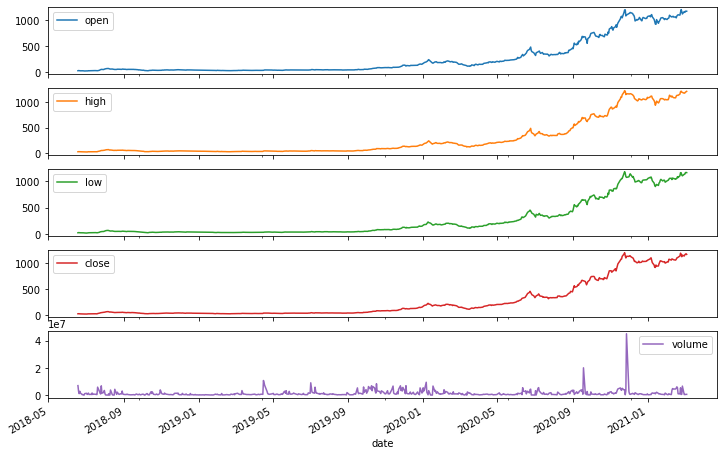

In [174]:
#visualizing every column and check their trends going upward or downward
dataset.set_index('date')[['open','high','low','close','volume']].plot(subplots=True)

In [175]:
dataset.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64

<AxesSubplot:>

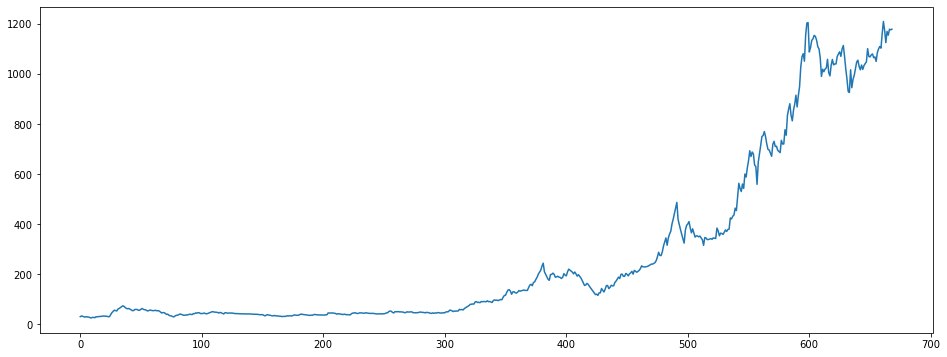

In [176]:
#visualization for open stock is going keep on increasing
dataset['open'].plot(figsize=(16,6))

In [177]:
#For making data normalize and get same datatype for each column
dataset["volume"]=dataset["volume"].astype(float)

In [178]:
#here we can see all data types have float
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 669 entries, 0 to 668
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    669 non-null    datetime64[ns]
 1   open    669 non-null    float64       
 2   high    669 non-null    float64       
 3   low     669 non-null    float64       
 4   close   669 non-null    float64       
 5   volume  669 non-null    float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 31.5 KB


Now we find 7 day rolling mean for example-we look seven days back collect all the transactions that fall in this range and get the average of our column so luckily this is extremely easy to achieve with pandas

In [179]:
#7 day rolling mean
dataset.rolling(7).mean().head(20)

,open,high,low,close,volume
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
6,30.092857,30.850000,29.171429,30.278571,2.334957e+06
7,29.850000,30.392857,29.014286,29.692857,1.353126e+06
8,28.900000,29.392857,28.307143,28.757143,9.482536e+05
9,27.935714,28.700000,27.414286,28.157143,9.544410e+05


This is how it compares with the previous graph that we had gotten we had the rolling mean in orange and we have previous four off in the same blue

<AxesSubplot:>

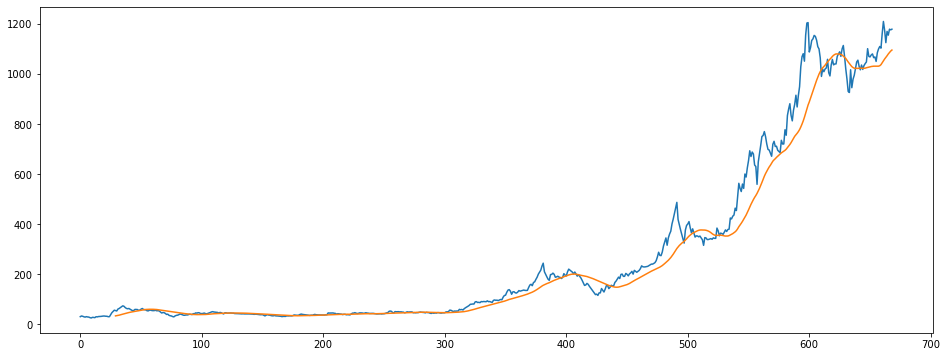

In [180]:
dataset['open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['close'].plot()

<AxesSubplot:>

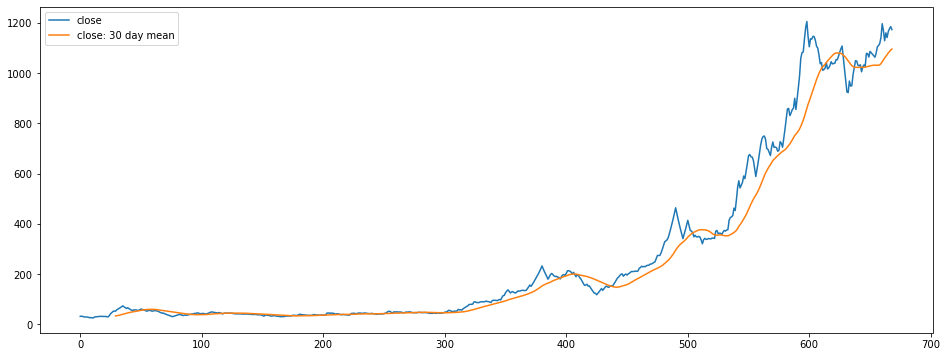

In [181]:
# gives the moving average of the past 30 days
dataset['close: 30 day mean']= dataset['close'].rolling(window=30).mean()
dataset[['close','close: 30 day mean']].plot(figsize=(16,6))

<AxesSubplot:>

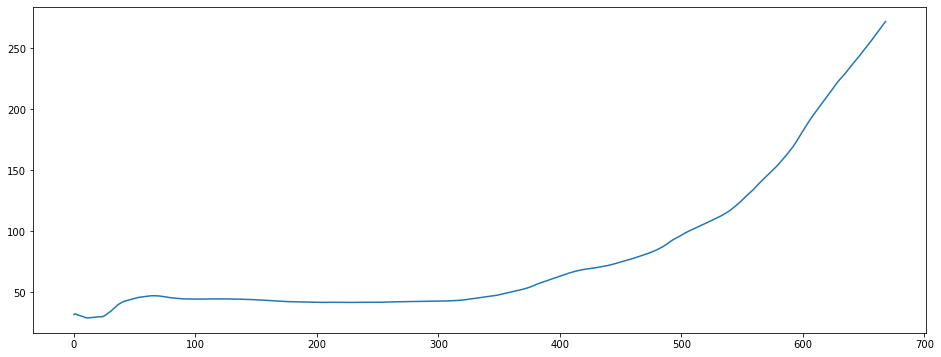

In [182]:
#Optional specify a minimum number of periods
dataset['close'].expanding(min_periods=1).mean().plot(figsize=(16,6))

In [183]:
#creating dataframe which is of the training set
training_set=dataset['open']
training_set=pd.DataFrame(training_set)

## LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [184]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_scaled = sc.fit_transform(training_set)

In [185]:
#creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 669):
    X_train.append(train_scaled[i-60:i, 0])
    y_train.append(train_scaled[i, 0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Building the RNN

In [186]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [187]:
#initialising the RNN
regressor= Sequential()

In [188]:
#Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

#Adding the second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#Adding the fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#Adding the output layer
regressor.add(Dense(units = 1))

In [189]:
#compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

#Fitting the RNN to the training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
20/20 [==============================] - 24s 154ms/step - loss: 0.0761
Epoch 2/100
20/20 [==============================] - 3s 142ms/step - loss: 0.0060
Epoch 3/100
20/20 [==============================] - 3s 136ms/step - loss: 0.0040
Epoch 4/100
20/20 [==============================] - 3s 141ms/step - loss: 0.0063
Epoch 5/100
20/20 [==============================] - 3s 133ms/step - loss: 0.0063
Epoch 6/100
20/20 [==============================] - 3s 134ms/step - loss: 0.0032
Epoch 7/100
20/20 [==============================] - 3s 143ms/step - loss: 0.0055
Epoch 8/100
20/20 [==============================] - 3s 141ms/step - loss: 0.0032
Epoch 9/100
20/20 [==============================] - 3s 141ms/step - loss: 0.0035
Epoch 10/100
20/20 [==============================] - 3s 140ms/step - loss: 0.0028
Epoch 11/100
20/20 [==============================] - 3s 140ms/step - loss: 0.0037
Epoch 12/100
20/20 [==============================] - 3s 137ms/step - loss: 0.0036
Epoch 13/100

## Making prediction and visualising the results

In [190]:
#Getting the real stock data of Tata 2018
df_test =pd.read_csv("adani.csv")

In [191]:
df1=df.iloc[:132]

In [192]:
df1

,date,open,high,low,close,volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,1612972
...,...,...,...,...,...,...
127,2018-12-24,42.500000,43.200001,42.000000,42.150002,174059
128,2018-12-26,42.200001,42.400002,40.150002,41.549999,517905
129,2018-12-27,41.750000,42.700001,41.250000,41.450001,212220
130,2018-12-28,42.000000,42.549999,41.549999,41.700001,233894


In [193]:
real_stock_price=df1.iloc[:, 1:2].values

In [194]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    132 non-null    object 
 1   open    132 non-null    float64
 2   high    132 non-null    float64
 3   low     132 non-null    float64
 4   close   132 non-null    float64
 5   volume  132 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 6.3+ KB


In [195]:
#converting int to float datatype
df1["volume"]=df1["volume"].astype(float)

<ipython-input-195-ce51cf8950ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["volume"]=df1["volume"].astype(float)


In [196]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    132 non-null    object 
 1   open    132 non-null    float64
 2   high    132 non-null    float64
 3   low     132 non-null    float64
 4   close   132 non-null    float64
 5   volume  132 non-null    float64
dtypes: float64(5), object(1)
memory usage: 6.3+ KB


In [197]:
df1.shape

(132, 6)

In [215]:
#getting the prediction stock price of 2018
dataset_total = pd.concat((dataset['open'], df1['open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,132):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

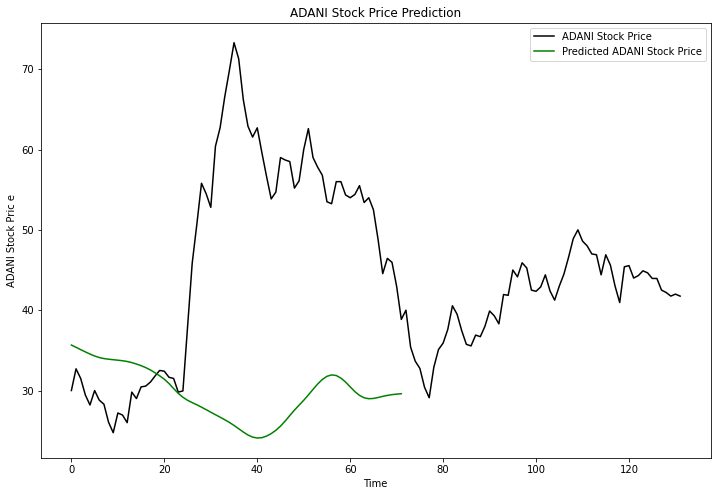

In [216]:
plt.plot(real_stock_price, color = 'black', label = 'ADANI Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted ADANI Stock Price')
plt.title('ADANI Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ADANI Stock Pric e')
plt.legend()
plt.show()

The predicted stock and the real stock plot we can see that the real stock went up while our model not well predicted the stock it's towards downor we can improve our model by adding more layer or more epochs